In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings

/home/udith/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("drug200.csv")


dataset.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [4]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
dataset.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
dataset.size

1200

In [7]:
dataset.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [8]:
encoder = LabelEncoder()
dataset.Age = encoder.fit_transform(dataset.Age)
dataset.Sex = encoder.fit_transform(dataset.Sex)
dataset.BP = encoder.fit_transform(dataset.BP)
dataset.Cholesterol = encoder.fit_transform(dataset.Cholesterol)
dataset.Drug = encoder.fit_transform(dataset.Drug)

In [9]:
dataset.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

In [10]:
features = list(dataset.columns)
target = "Drug"
features.remove(target)

X = dataset[features]
y = dataset[target]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

<h1>Decision Tree</h1>

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [13]:
y_pred = model.predict(X_test)

print(y_pred)

[4 1 3 2 4 4 4 4 4 1 3 3 3 4 0 3 3 4 2 4 4 4 4 4 1 4 1 4 3 0 4 4 2 4 3 4 0
 2 4 4 2 0 4 4 4 4 3 3 0 1 0 4 0 4 4 3 2 4 4 3]


In [14]:
print(accuracy_score(Y_test, y_pred))

0.9666666666666667


In [15]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         6
           3       1.00      0.92      0.96        13
           4       0.97      1.00      0.98        29

    accuracy                           0.97        60
   macro avg       0.96      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60



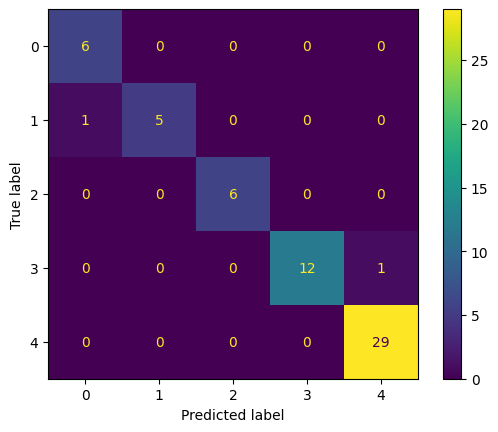

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred), display_labels=model.classes_)
disp.plot()
plt.show()

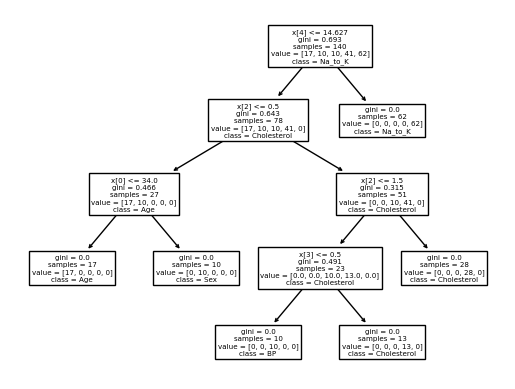

In [17]:
plot_tree(model, class_names=features)
plt.show()

<h1>Random Forests</h1>

In [18]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [19]:
y_pred = model.predict(X_test)

print(y_pred)

[4 1 3 2 4 4 4 4 4 1 3 3 3 4 0 3 3 4 2 4 4 4 4 4 1 4 1 4 3 0 4 4 2 4 3 4 0
 3 4 4 2 0 4 4 4 4 3 3 0 1 0 4 0 4 4 3 2 4 4 3]


In [20]:
print(accuracy_score(Y_test, y_pred))

0.95


In [21]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6
           2       1.00      0.83      0.91         6
           3       0.92      0.92      0.92        13
           4       0.97      1.00      0.98        29

    accuracy                           0.95        60
   macro avg       0.95      0.92      0.93        60
weighted avg       0.95      0.95      0.95        60



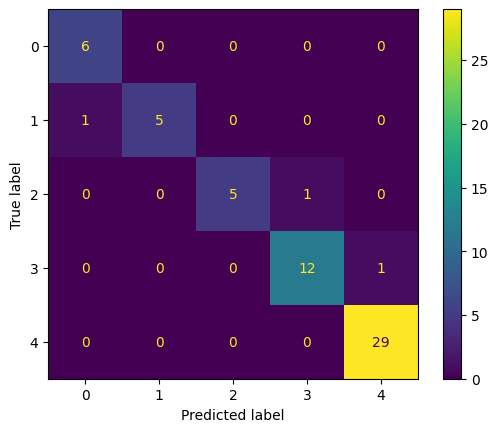

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred), display_labels=model.classes_)
disp.plot()
plt.show()

<h1>Gradient Boosting with Logistic Regressor</h1>

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
simple_model = LogisticRegression()
simple_model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
y_pred = simple_model.predict(X_test)
y_pred

array([4, 0, 3, 1, 4, 4, 4, 4, 4, 1, 3, 3, 2, 1, 0, 3, 3, 4, 1, 4, 4, 4,
       4, 3, 1, 4, 1, 4, 3, 0, 4, 1, 4, 4, 3, 4, 0, 1, 4, 4, 3, 0, 4, 4,
       4, 4, 3, 3, 0, 1, 1, 4, 0, 4, 4, 3, 2, 4, 4, 2])

In [26]:
print(accuracy_score(Y_test, y_pred))

0.8


In [27]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.40      0.67      0.50         6
           2       0.33      0.17      0.22         6
           3       0.92      0.85      0.88        13
           4       0.96      0.93      0.95        29

    accuracy                           0.80        60
   macro avg       0.67      0.69      0.66        60
weighted avg       0.81      0.80      0.80        60



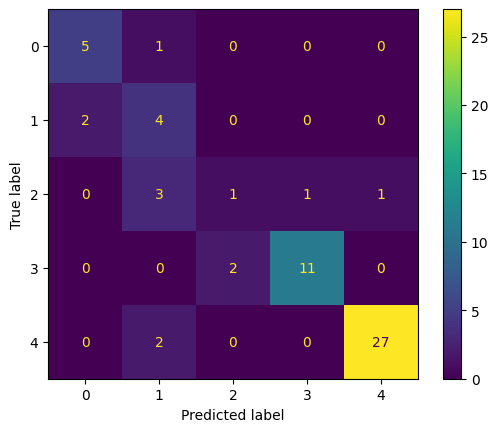

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred), display_labels=model.classes_)
disp.plot()
plt.show()

In [29]:
model = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=100, algorithm="SAMME")

In [30]:
model.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=LogisticRegression(),
                   n_estimators=100)

In [31]:
y_pred = model.predict(X_test)
y_pred

array([4, 1, 3, 1, 4, 4, 4, 4, 4, 1, 3, 3, 2, 1, 0, 3, 3, 4, 3, 4, 4, 4,
       1, 1, 1, 4, 1, 4, 2, 0, 4, 4, 2, 4, 3, 4, 0, 1, 4, 4, 2, 2, 4, 4,
       4, 4, 3, 3, 0, 1, 0, 4, 0, 4, 4, 3, 2, 4, 4, 3])

In [32]:
print(accuracy_score(Y_test, y_pred))

0.8333333333333334


In [33]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.83      0.62         6
           2       0.50      0.50      0.50         6
           3       0.91      0.77      0.83        13
           4       1.00      0.93      0.96        29

    accuracy                           0.83        60
   macro avg       0.75      0.77      0.75        60
weighted avg       0.86      0.83      0.84        60



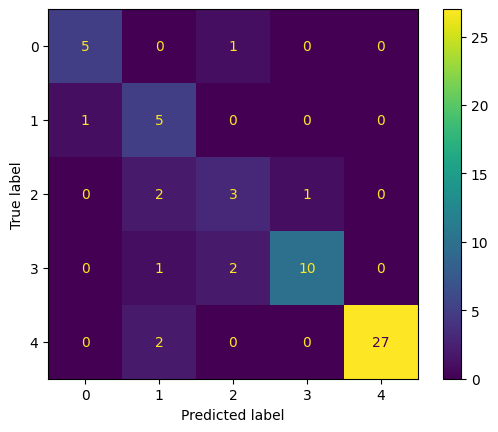

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred), display_labels=model.classes_)
disp.plot()
plt.show()

In [35]:
from Decision_Tree import CustomDecisionTree

In [36]:
model = CustomDecisionTree()
model.fit(X_train, Y_train)

In [37]:
y_pred = model.predict(X_test)
y_pred

[4,
 1,
 3,
 2,
 4,
 4,
 4,
 4,
 4,
 1,
 3,
 3,
 3,
 4,
 1,
 3,
 3,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 1,
 4,
 3,
 0,
 4,
 4,
 2,
 4,
 3,
 4,
 0,
 2,
 4,
 4,
 2,
 0,
 4,
 4,
 4,
 4,
 3,
 3,
 0,
 1,
 0,
 4,
 0,
 4,
 4,
 3,
 2,
 4,
 4,
 3]

In [38]:
print(accuracy_score(Y_test, y_pred))

0.9833333333333333


In [39]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      0.92      0.96        13
           4       0.97      1.00      0.98        29

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



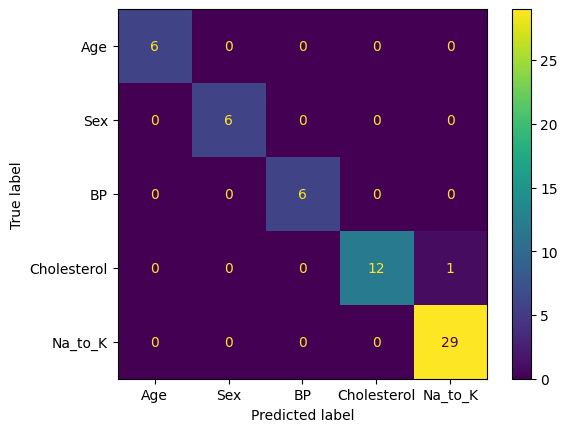

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred), display_labels=model.classes_)
disp.plot()
plt.show()